In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
D=pd.read_csv('MNIST_train.csv')

In [110]:
#print the first 5 rows.
print(D.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [111]:
Dy=D['label']

In [112]:
print(Dy.head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [113]:
Dx=D.drop('label', axis=1)

In [114]:
print(Dx.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [115]:
print(Dx.shape)
print(Dy.shape)

(42000, 784)
(42000,)


Enter a row number: 1266


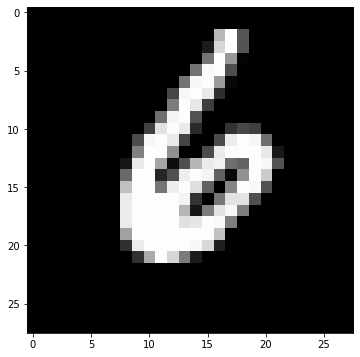

6


In [116]:
#display or plot a number

row=int(input('Enter a row number: '))

plt.figure(figsize=(6,6))

#reshape from 1D to 2D
grid_data= Dx.iloc[row].values.reshape(28,28)
plt.imshow(grid_data,interpolation='none', cmap='gray')
plt.show()

print(Dy[row])

## 2D Visualization using PCA

In [117]:
# Pick first 15k data points for time efficiency.

data=Dx.head(15000)
labels=Dy.head(15000)

print(data.shape)
print(labels.shape)

(15000, 784)
(15000,)


In [118]:
# Data pre-processing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data= StandardScaler().fit_transform(data)

print(standardized_data.shape)

(15000, 784)


In [119]:
#Make a copy of the standardized data.
sample_data= standardized_data

# Find the co-variance matrix which is A^T*A

#Matrix multiplication using numpy

covariance_matrix=np.matmul(sample_data.T, sample_data)

In [120]:
print(sample_data.shape)

(15000, 784)


In [121]:
print(covariance_matrix.shape)

(784, 784)


In [122]:
from scipy.linalg import  eigh

values, vectors = eigh(covariance_matrix, eigvals=(782,783))

In [123]:
print(values)

[435532.55785282 605719.29173629]


In [124]:
print(vectors)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [125]:
print(vectors.shape)

(784, 2)


In [126]:
vectors=vectors.T

In [127]:
print(vectors.shape)

(2, 784)


In [128]:
new_coordinates= np.matmul(vectors, sample_data.T)

In [129]:
print(new_coordinates.shape)

(2, 15000)


In [130]:
# Appending label to the 2d projected data
new_coordinates=np.vstack((new_coordinates, labels)).T

In [131]:
print(new_coordinates.shape)

(15000, 3)


In [132]:
#Creating a new dataframe for ploting the labeled points.
dataframe=pd.DataFrame(data=new_coordinates, columns=('1st principle', '2nd principle', 'label'))

In [133]:
print(dataframe.head())

   1st principle  2nd principle  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


In [134]:
import seaborn as sns

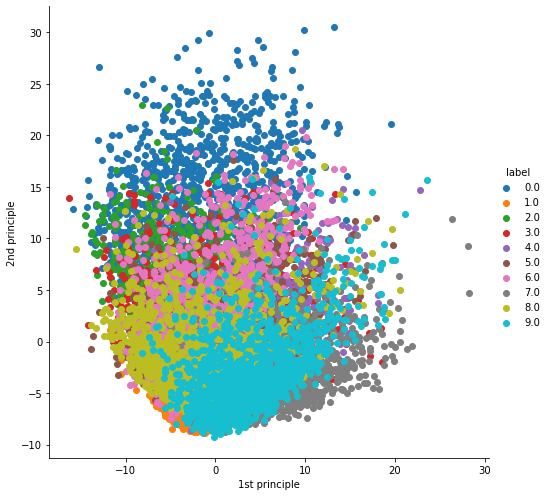

In [135]:
sns.FacetGrid(dataframe, hue='label', height=7).map(plt.scatter, '1st principle', '2nd principle').add_legend()
plt.show()